K-Nearest Neighbours Implementation
1. Preprocess the data
2. Split the data into training and testing sets.
3. Implement the KNN algorithm.
4. Test different values of K (from 1 to 10).
5. Evaluate the model accuracy for each value of K.
6. Plot the results to visualize how the accuracy changes with K.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load and preprocess the data

In [7]:
# Load the dataset
df = pd.read_csv('star_classification.csv')
df = df[0:20000]  # Using the first 20,000 samples

# Drop unnecessary columns and extract numerical features
numerical_features = ["u", "g", "r", "i", "z"]
data = df[numerical_features].values

# Manual Standardization
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
x_standardized = (data - data_mean) / data_std

# Convert target class values into numeric format
class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
df['class_numeric'] = df['class'].map(class_mapping)
y = df['class_numeric'].values

print("Standardized data (first 5 rows):\n", x_standardized[:5])
print("Mapped target values (first 5 rows):\n", y[:5])


Standardized data (first 5 rows):
 [[ 0.81351504  0.82062233  0.40967686  0.04660894  0.01166271]
 [ 1.21278737  1.09329573  1.58408073  1.17520171  1.58551644]
 [ 1.42845848  1.01099596  0.52486814  0.14966175  0.09790617]
 [ 0.03964365  1.5561027   1.06226292  0.80119286  0.2663253 ]
 [-1.15965265 -1.47950892 -1.68095222 -1.75057017 -1.80131349]]
Mapped target values (first 5 rows):
 [0 0 0 0 0]


Split the data into training and testing sets


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.3, random_state=42)


K-NN implementation 

In [13]:
def euclidean_distance(x1, x2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(x_train, y_train, x_test_instance, k):
    """Predict the class for a single test instance using KNN."""
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distance(x_train[i], x_test_instance)
        distances.append((dist, y_train[i]))
    # Sort by distance
    distances.sort(key=lambda x: x[0])
    # Get the classes of the k nearest neighbors
    neighbors = [distances[i][1] for i in range(k)]
    # Return the most common class
    return max(set(neighbors), key=neighbors.count)

def knn(x_train, y_train, x_test, k):
    """Predict the classes for a test set using KNN."""
    predictions = []
    for instance in x_test:
        pred = knn_predict(x_train, y_train, instance, k)
        predictions.append(pred)
    return np.array(predictions)

# Test different values of K and evaluate accuracy
accuracy_list = []
for k in range(1, 11):
    y_pred = knn(x_train, y_train, x_test, k)
    accuracy = np.mean(y_pred == y_test)  # Accuracy calculation
    accuracy_list.append(accuracy)
    print(f'Accuracy for K={k}: {accuracy * 100:.2f}%')


Accuracy for K=1: 82.03%
Accuracy for K=2: 82.58%
Accuracy for K=3: 84.03%
Accuracy for K=4: 84.88%
Accuracy for K=5: 84.93%
Accuracy for K=6: 84.95%
Accuracy for K=7: 84.88%
Accuracy for K=8: 84.62%


KeyboardInterrupt: 

Plot the results to visualize the accuracy for each value of K


ValueError: x and y must have same first dimension, but have shapes (10,) and (8,)

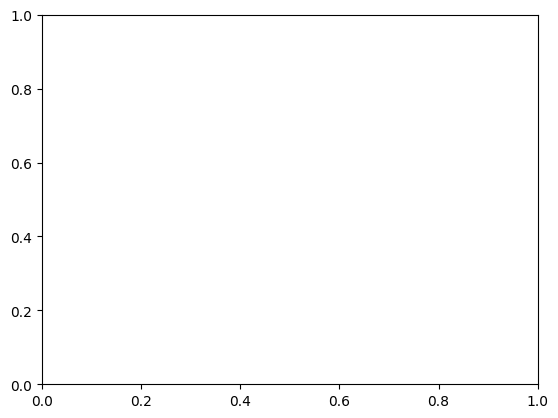

In [14]:
plt.plot(range(1, 11), accuracy_list, marker='o', linestyle='-', color='b')
plt.title("K-Nearest Neighbors: Accuracy for different K values")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Find the optimal K (with the highest accuracy)


In [15]:
optimal_k = np.argmax(accuracy_list) + 1
print(f"\nOptimal value of K is: {optimal_k}")


Optimal value of K is: 6
